In [1]:
#Importación de librerías necesarias para el preprocesamiento de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

1 - Ingesta de datos mediante pandas, seguido de visualización del dataset y de valores numéricos con métricas de tendencia central básicas

In [2]:
E_commerce = pd.read_excel(r'E-Commerce_train.xlsx')
E_commerce

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [3]:
E_commerce.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Comprobamos que el dataset no tenga duplicados y luego utilizamos la librería de python missingno que provee una serie de visualizaciones para observar la presencia de valores faltantes y su respectiva distribución

In [4]:
E_commerce[E_commerce.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [5]:
import missingno as msno

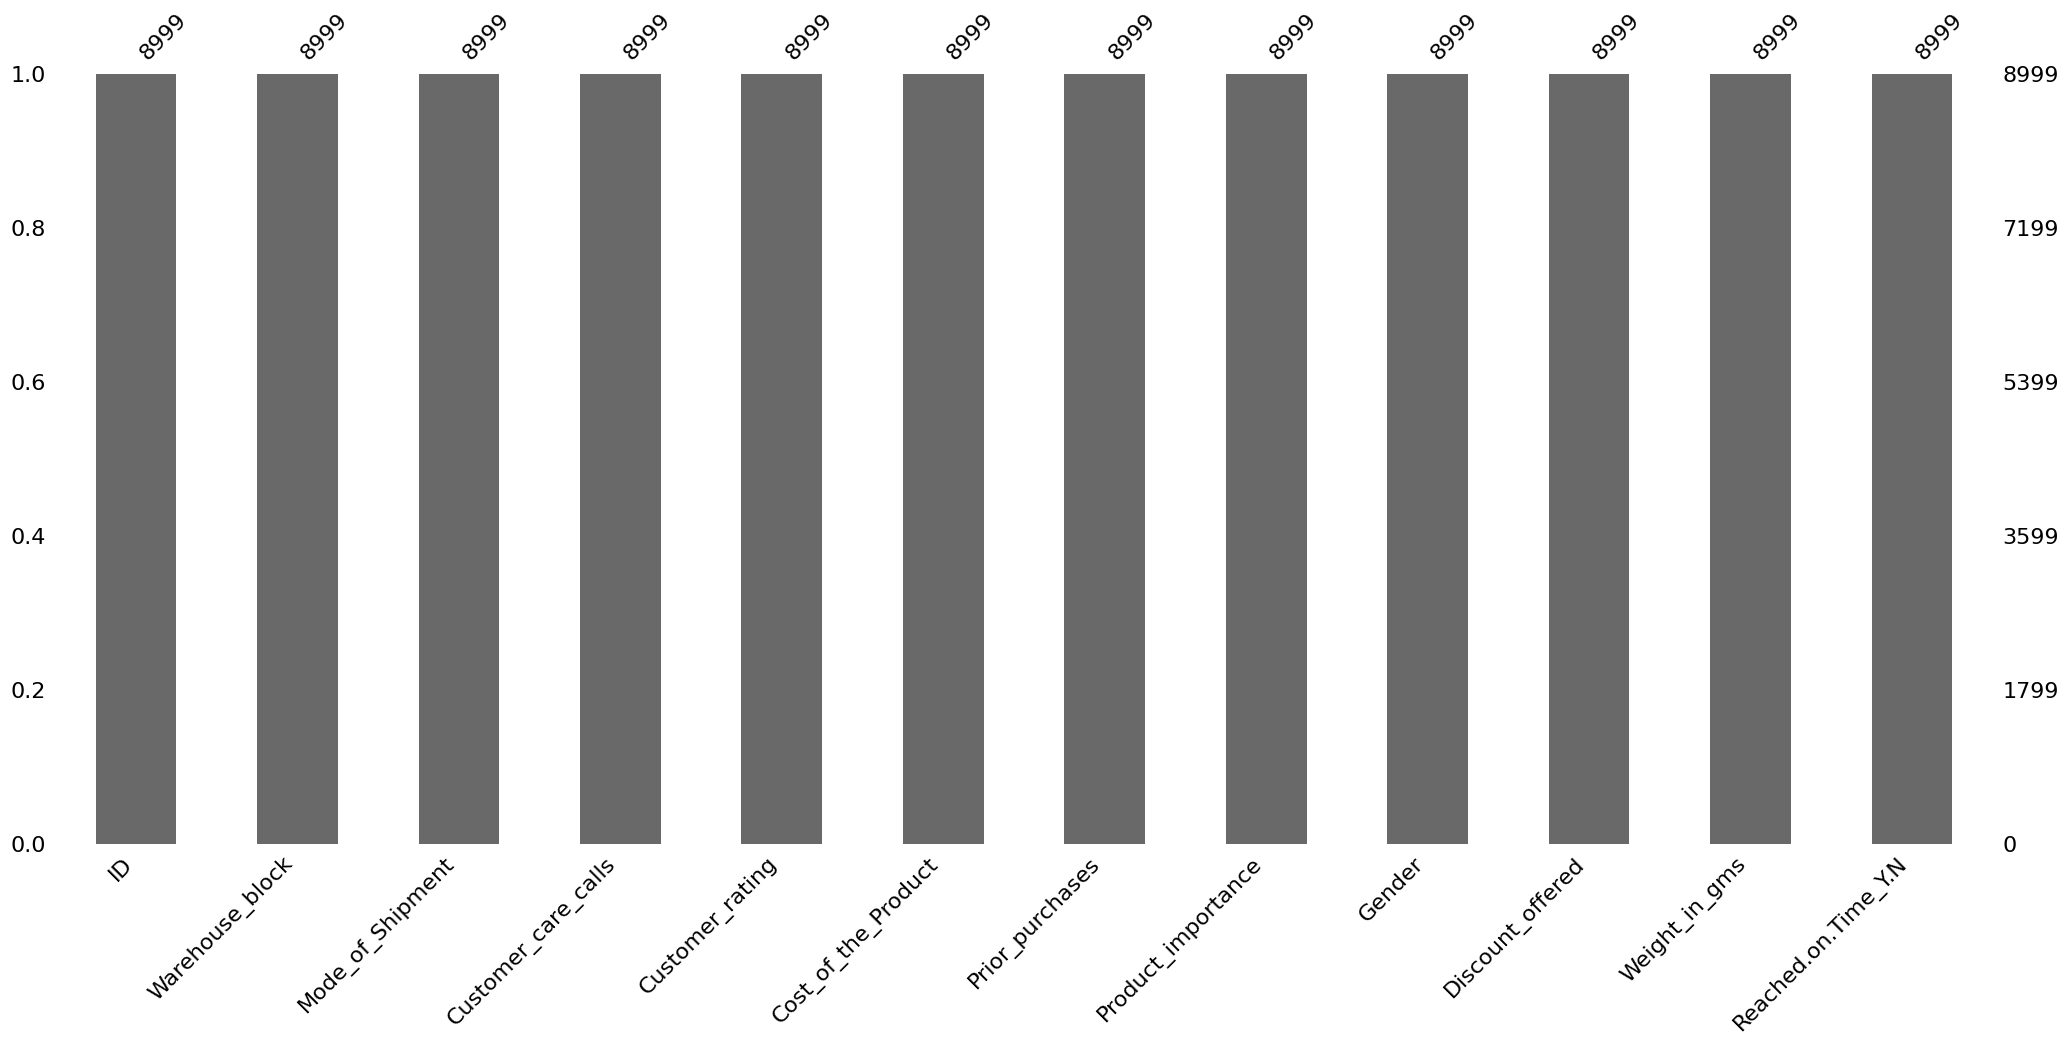

In [6]:
msno.bar(E_commerce)
plt.show()

Se puede observar claramente que el dataset no posee valores faltantes, aunque faltan medidas como la verificación de outliers para evitar que el modelo distorsione la futura predicción. Para ser preciso tomaremos de la información que nos devuelve el método 'describe()' al principio del notebook para evaluar las columnas que presentan una desviación estándar anormal

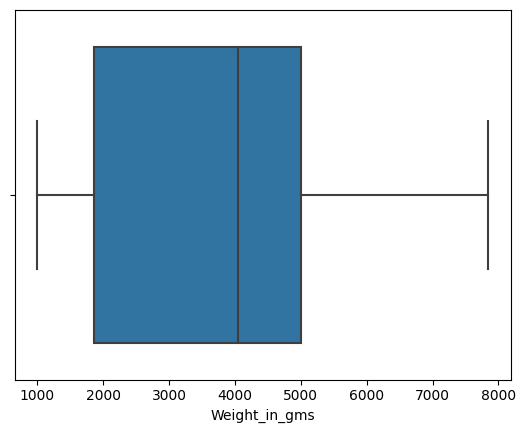

In [7]:
sns.boxplot(x = 'Weight_in_gms', data= E_commerce)
plt.show()

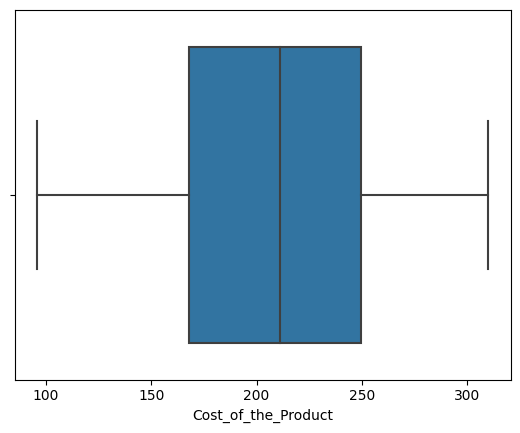

In [8]:
sns.boxplot(x = 'Cost_of_the_Product', data= E_commerce)
plt.show()

Como es observable a primera vista, la columna del dataset que contiene los descuentos ofrecidos es la que presenta anomalías fácilmente destacables, que con el gráfico siguiente se podrá comprobar

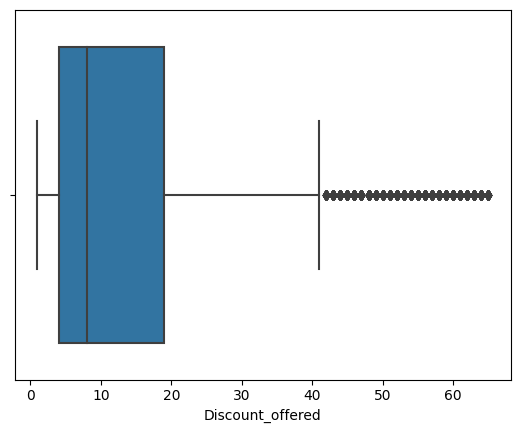

In [9]:
sns.boxplot(x = 'Discount_offered', data= E_commerce)
plt.show()

En ésta sección usaremos código del workshop de Preprocesado de datos para eliminación de outliers, aunque se podrá observar que sólo 1 vez se realizará el proceso, a fines de demostración y si la evaluación final del modelo no es satisfactoria se procederá a realizar otra limpieza de ser detectado como problema en la predicción final.

In [10]:
Q1 = E_commerce['Discount_offered'].quantile(0.25)
Q3 = E_commerce['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

4.0
19.0
15.0
-18.5
41.5


In [11]:
print('Cantidad de registros totales:', E_commerce.shape[0])
print('Cantidad de outliers:', E_commerce[(E_commerce['Discount_offered']<BI) | (E_commerce['Discount_offered']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 1193


In [12]:
Descuentos_s_outliers = (E_commerce['Discount_offered']<BI) | (E_commerce['Discount_offered']>BS) 

E_commerce = E_commerce[~Descuentos_s_outliers]

In [13]:
print('Tamaño del dataset, luego de eliminar outliers en Discount_offered:', E_commerce.shape[0])

Tamaño del dataset, luego de eliminar outliers en Discount_offered: 7806


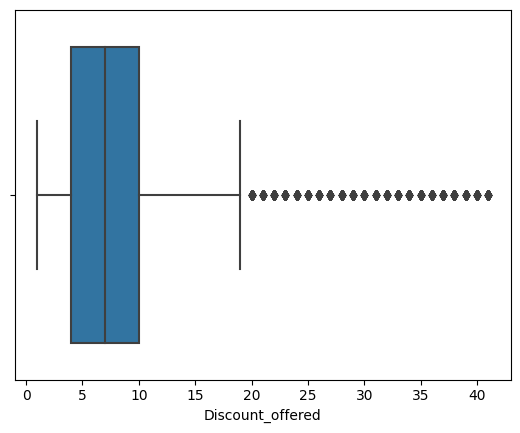

In [14]:
sns.boxplot(x = 'Discount_offered', data= E_commerce)
plt.show()

In [15]:
E_commerce.reset_index(drop = True, inplace = True)

In [16]:
E_commerce

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,B,Flight,3,3,176,4,medium,M,10,1177,1
1,6,F,Flight,3,1,162,3,medium,F,12,1417,1
2,7,D,Flight,3,4,250,3,low,F,3,2371,1
3,9,A,Flight,3,4,150,3,low,F,11,1861,1
4,10,B,Flight,3,2,164,3,medium,F,29,1187,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7801,8995,D,Ship,3,1,217,3,low,F,1,4177,1
7802,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
7803,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
7804,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


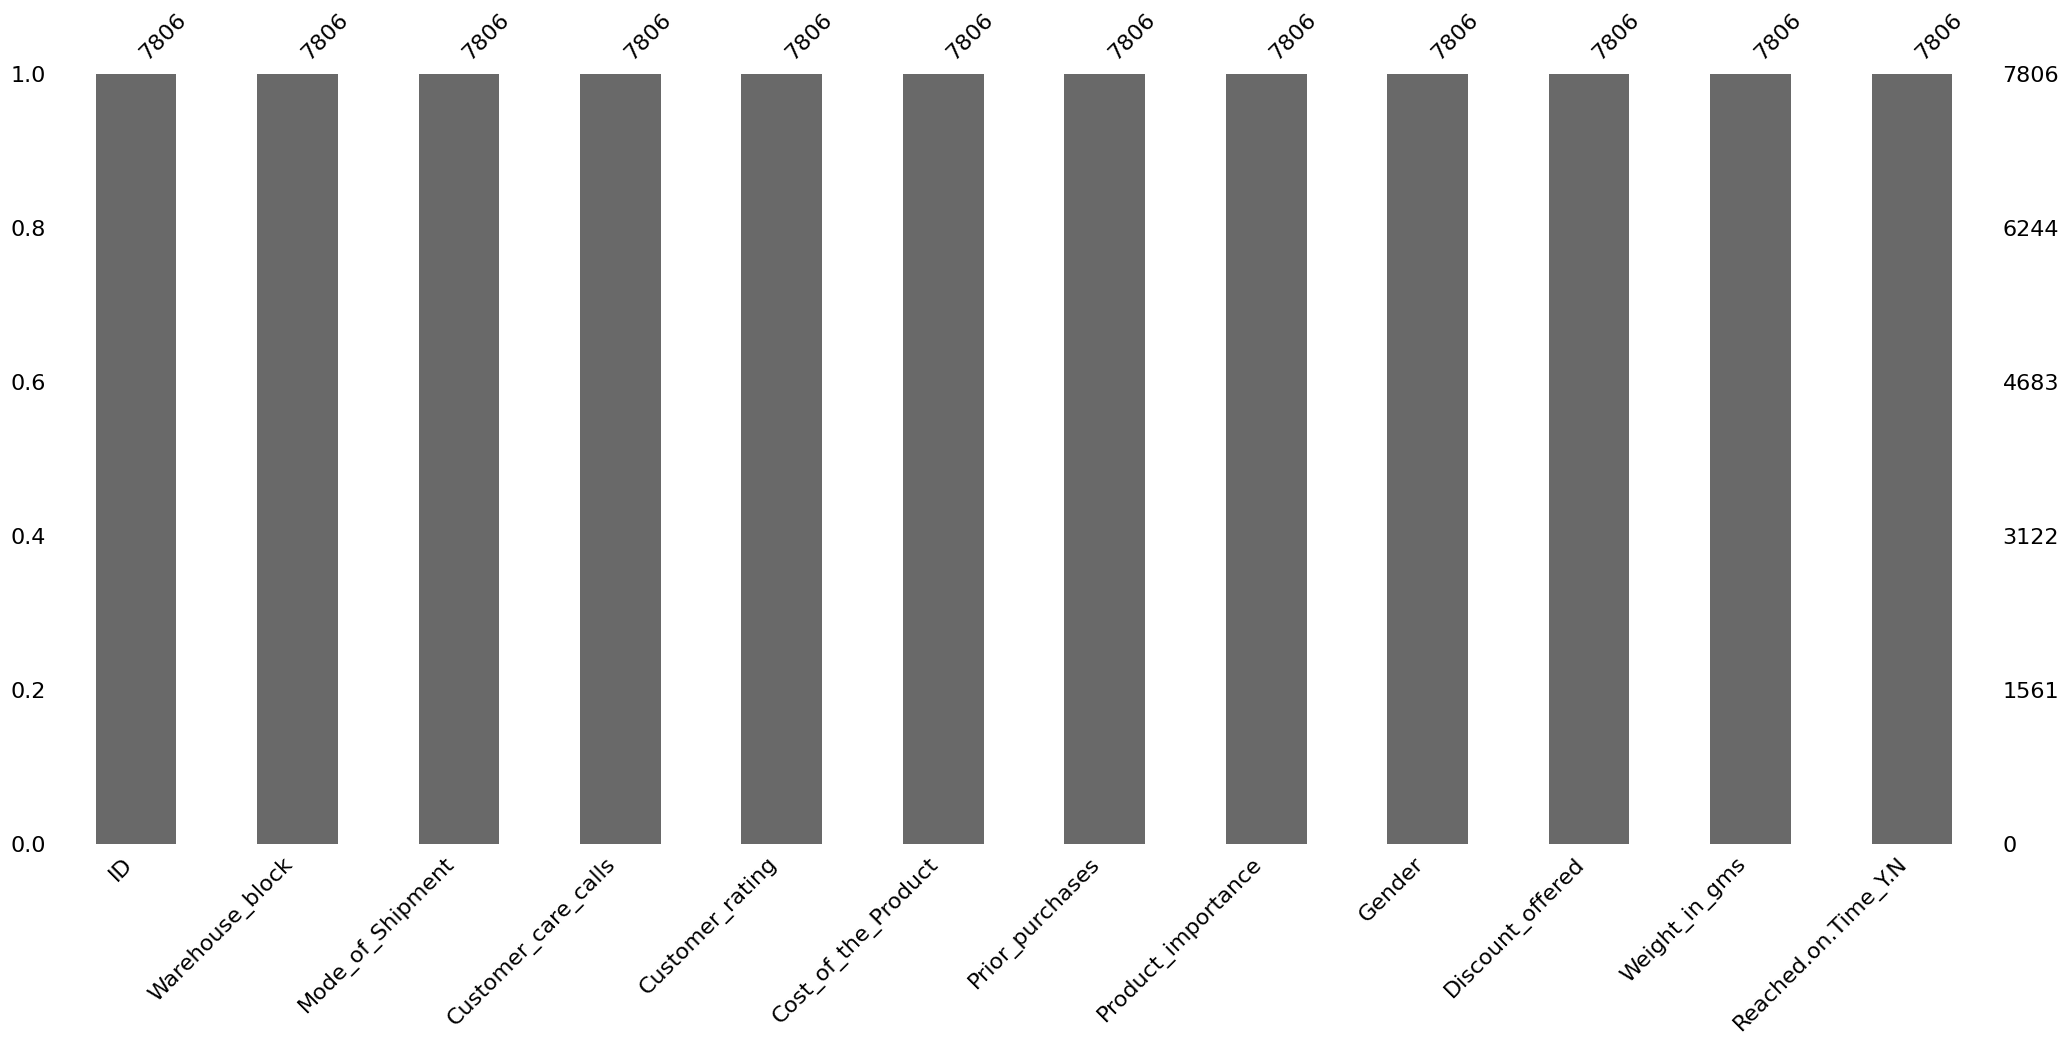

In [17]:
msno.bar(E_commerce)
plt.show()

La siguiente técnica a utilizar sería estandarización de features, aunque no es necesario porque estaremos usando un modelo de random forest para el cual no hace diferencia tanto en rendimiento como en output, luego de observar los resultados se tomaran medidas si el modelo no predice eficientemente.

Seguiremos un último paso antes de introducir el modelo y ésto es la codificación de variables categóricas, de las cuales contamos con 4 columnas Warehouse_block, Mode_of_Shipment, Product_importance y Gender.
Para ésta sección de ingeniería de features, utilizaremos LabelEncoder y OneHotEncoder, ambos parte de la librería skikit-Learn

In [18]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [19]:
E_commerce.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,B,Flight,3,3,176,4,medium,M,10,1177,1
1,6,F,Flight,3,1,162,3,medium,F,12,1417,1
2,7,D,Flight,3,4,250,3,low,F,3,2371,1
3,9,A,Flight,3,4,150,3,low,F,11,1861,1
4,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [29]:
print(E_commerce['Warehouse_block'].unique())
print(E_commerce['Mode_of_Shipment'].unique())
print(E_commerce['Product_importance'].unique())

[1 4 3 0 2]
[0 2 1]
[2 1 0]


In [30]:
#Instanciamos LabelEncoder
lbl_Encode = LabelEncoder()

In [31]:
E_commerce['Warehouse_block'] = lbl_Encode.fit_transform(E_commerce['Warehouse_block'])
E_commerce['Mode_of_Shipment']= lbl_Encode.fit_transform(E_commerce['Mode_of_Shipment'])
E_commerce['Product_importance']= lbl_Encode.fit_transform(E_commerce['Product_importance'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13072\3656755655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_commerce['Warehouse_block'] = lbl_Encode.fit_transform(E_commerce['Warehouse_block'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13072\3656755655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_commerce['Mode_of_Shipment']= lbl_Encode.fit_transform(E_commerce['Mode_of_Shipment'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13072\3656755655.py:3: SettingWithCopyWarning: 
A value is 

In [32]:
E_commerce['Warehouse_block'].value_counts()
E_commerce['Mode_of_Shipment'].value_counts()
E_commerce['Product_importance'].value_counts()

1    3762
2    3329
0     715
Name: Product_importance, dtype: int64

In [33]:
E_commerce

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,1,0,3,3,176,4,2,M,10,1177,1
1,6,4,0,3,1,162,3,2,F,12,1417,1
2,7,3,0,3,4,250,3,1,F,3,2371,1
3,9,0,0,3,4,150,3,1,F,11,1861,1
4,10,1,0,3,2,164,3,2,F,29,1187,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7801,8995,3,2,3,1,217,3,1,F,1,4177,1
7802,8996,4,2,5,3,232,3,2,M,3,4526,0
7803,8997,0,2,4,5,260,3,2,F,6,4221,0
7804,8998,1,2,4,2,184,3,2,F,5,5931,1


Una vez realizado el proceso, cabe destacar que sólo se usó label encoder para datos categóricos, y se dejó la columna de genero ya que se considera como un factor sin relevancia para el análisis de éste modelo, donde lo que importa son las variables que afectan la llegada o no del paquete y no el género del comprador.

In [34]:
#Importación de librerías de entrenamiento y separación del conjunto de datos, y elección del modelo RandomForest, para el cual se dará una breve explicación del porqué de ésta decision
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Un Random Forest es un conjunto (ensemble) de árboles de decisión combinados con bagging. Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

In [35]:
E_commerce1=E_commerce.rename(columns= {'Reached.on.Time_Y.N': 'Reached_on_Time'})

Luego del renombre de la columna a predecir para el entrenamiento, se procederá a seguir los mismos pasos que el trabajo anterior, agregando las columnas recientemente codificadas

In [83]:
X = E_commerce1[['Cost_of_the_Product','Weight_in_gms','Mode_of_Shipment','Product_importance','Customer_rating','Customer_care_calls']]
y = E_commerce1.Reached_on_Time

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [85]:
#Verificamos que el modelo haya hecho la división correcta del dataset con los porcentajes similares del anterior trabajo, 
# siendo 80-20 la división
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

6244
1562
6244
1562


Se instancia el modelo con los datos en la siguiente etapa, para evaluarlo se declara el parámetro 'n_estimators' que indica el número de árboles de decisión del que dispone para luego ejecutar la combinación, su valor de default es 10 y puede tomar un valor entero mucho mayor al que disponemos en ésta instancia(50) pero a partir de cierto valor su relación costo-beneficio comienza a decrecer haciendo sólo que el modelo sea lento.

In [91]:
modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
modelo.score(X_test, y_test)

0.6350832266325224

In [93]:
y_predicción = modelo.predict(X_test)

Importación de una matriz de confusión para interpretar mejor los resultados

In [94]:
from sklearn.metrics import confusion_matrix
mc = confusion_matrix(y_test, y_predicción)
mc

array([[409, 244],
       [326, 583]], dtype=int64)

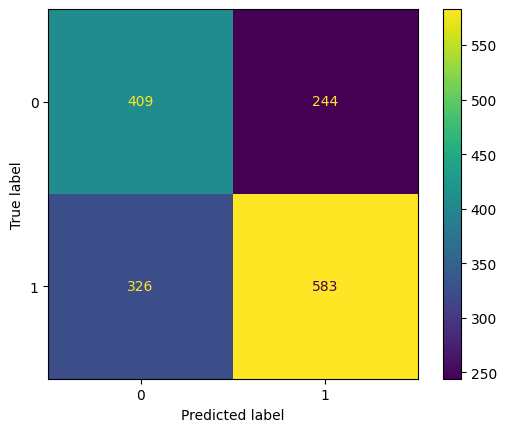

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

mc = ConfusionMatrixDisplay(mc)
mc.plot()
plt.show()

La importación de ésta librería es fundamental para cerrar el flujo de trabajo de ésta notebook, joblib(https://joblib.readthedocs.io/en/latest/). Para generar un modelo fácilmente reproducible y ligero, jobline es una herramienta que permitirá mediante el parámetro dump crear el archivo modelo_de_predicción que luego será usado en modelo.ipynb

In [96]:
import joblib

joblib.dump(modelo, 'modelo_de_predicción(1).joblib')

['modelo_de_predicción(1).joblib']